In [1]:
!pip install -q gdown transformers torch pandas numpy matplotlib seaborn scikit-learn

##1. Google Drive에서 모델 로드

In [2]:
import os
import zipfile
import gdown
import shutil

# https://drive.google.com/file/d/1iwRFkAnueiGc9SPCzylBbPavJZ163fSz/view?usp=drive_link
file_id = '1iwRFkAnueiGc9SPCzylBbPavJZ163fSz'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'assignment5_final_model.zip'
extract_path = './assignment5_final_model'

if os.path.exists(extract_path):
    shutil.rmtree(extract_path)

print(f"Downloading model from Google Drive (ID: {file_id})...")
gdown.download(url, output, quiet=False)

print("Unzipping model...") # 압축 해제
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 압축 푼 폴더 내 확인
inner_files = os.listdir(extract_path)

# 이중 폴더가 생성되어 모델을 정상적으로 불러오지 못 해 이중 폴더 제거 코드 추가
if len(inner_files) == 1 and inner_files[0] == 'assignment5_final_model':
    nested_folder = os.path.join(extract_path, 'assignment5_final_model')
    print("이중 폴더 감지. 파일을 상위로 이동합니다.")

    # 내부 폴더의 모든 파일을 상위로 이동
    for file_name in os.listdir(nested_folder):
        shutil.move(os.path.join(nested_folder, file_name), extract_path)

    # 빈 내부 폴더 삭제
    os.rmdir(nested_folder)

print("폴더 구조 정리 및 모델 준비 완료.")

if os.path.exists(output):
    os.remove(output)

Downloading...
From (original): https://drive.google.com/uc?id=1iwRFkAnueiGc9SPCzylBbPavJZ163fSz
From (redirected): https://drive.google.com/uc?id=1iwRFkAnueiGc9SPCzylBbPavJZ163fSz&confirm=t&uuid=ed9f8dde-175d-46d1-9fab-ca6b6dac2dec
To: /content/assignment5_final_model.zip
100%|██████████| 405M/405M [00:03<00:00, 120MB/s]


Unzipping model...
이중 폴더 감지. 파일을 상위로 이동합니다.
폴더 구조 정리 및 모델 준비 완료.


##2. Google Drive에서 Test Dataset 로드

In [3]:
# https://drive.google.com/file/d/1TnpbatU-9QKAmi4mFbkudlw8-cVtUE3b/view?usp=sharing
test_file_id = '1TnpbatU-9QKAmi4mFbkudlw8-cVtUE3b'
test_url = f'https://drive.google.com/uc?id={test_file_id}'
test_output = 'test.tsv'

if not os.path.exists(test_output):
    print(f"Downloading {test_output} from Google Drive...")
    try:
        gdown.download(test_url, test_output, quiet=False)
        print(f"{test_output} 다운로드 완료.")
    except Exception as e:
        print(f"{test_output} 다운로드 실패: {e}")
else:
    print(f"ℹ{test_output} 파일이 이미 존재합니다.")

Downloading...
From: https://drive.google.com/uc?id=1TnpbatU-9QKAmi4mFbkudlw8-cVtUE3b
To: /content/test.tsv
100%|██████████| 15.2M/15.2M [00:00<00:00, 54.6MB/s]

test.tsv 다운로드 완료.


##3. Evaluation

Using Device: cuda
Loading Model & Tokenizer...
Model Loaded Successfully!
Preparing Test DataLoader...
Evaluating...
Evaluation Done!

Final Evaluation Report (Test Set)
Total Accuracy : 0.9650
Macro F1-Score : 0.9344
------------------------------------------------------------
              precision    recall  f1-score   support

Negative (0)     0.8775    0.9018    0.8895      7191
Positive (1)     0.9818    0.9767    0.9792     38892

    accuracy                         0.9650     46083
   macro avg     0.9296    0.9393    0.9344     46083
weighted avg     0.9655    0.9650    0.9652     46083



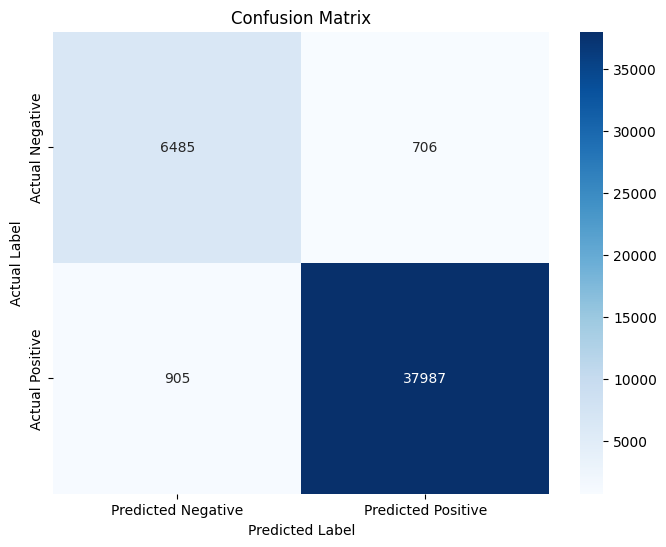


Error Analysis: Misclassified Examples
전체 샘플 수: 46083
틀린 예측 수: 1611
전체 오류율: 3.50%
------------------------------------------------------------
잘못 예측된 예시 30개를 출력합니다:

예시 [1]
문장      : 간단하게 맥주 한 잔 먹고 나와야지.. 이랬다가 사케 들이붓고 젖었네요..
실제 라벨 : 1 (긍정 (Positive))
예측 라벨 : 0 (부정 (Negative))
--------------------------------------------------
예시 [2]
문장      : crowded but comfy
실제 라벨 : 1 (긍정 (Positive))
예측 라벨 : 0 (부정 (Negative))
--------------------------------------------------
예시 [3]
문장      : 오징어볶음 맛나고 순댓국은 좀 짜요
실제 라벨 : 0 (부정 (Negative))
예측 라벨 : 1 (긍정 (Positive))
--------------------------------------------------
예시 [4]
문장      : 2015.7.23 현재 돌 냄비는 메뉴에 없더라 겨울에 하나??그냥 메밀이랑 비빔 냄비 3개 먹어봤다.  냄비는 국물이 그렇게 많이 짜지 않고 면의 굵기나 삶아진 정도도 적당해서 맛있게 먹었다. 그냥 판밀 같은 경유 쯔위가 좀 달았다. 먹으면서 압구정 하루랑 코엑스 현백에 송이 생각났음. 비빔국수도 조금 달았음 단맛을 줄이고 새콤한 맛이 좀 더 있었으면 좋겠다....
실제 라벨 : 0 (부정 (Negative))
예측 라벨 : 1 (긍정 (Positive))
--------------------------------------------------
예시 [5]
문장      : 아주아주 맛있지는 않고 그럭저럭 먹을만
실제 라벨 : 1 (긍정 (Positive))
예

In [4]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# 1. 설정 및 데이터 로드
MODEL_PATH = './assignment5_final_model'
TEST_DATA_PATH = 'test.tsv'
MAX_LEN = 128
BATCH_SIZE = 32
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"Using Device: {device}")

# 2. 모델 및 토크나이저 로드
print("Loading Model & Tokenizer...")
try:
    tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
    model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATH)
    model.to(device)
    model.eval() # 평가 모드 (Dropout 비활성화)
    print("Model Loaded Successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    print("모델 경로를 확인해주세요.")

# 3. Test 데이터셋 클래스 정의
class NaverReviewDataset(Dataset):
    def __init__(self, file_path, tokenizer, max_len):
        self.data = pd.read_csv(file_path, sep='\t', encoding='utf-8-sig')
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        text = str(self.data.iloc[index]['text'])
        label = self.data.iloc[index]['label']

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_token_type_ids=False,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# 데이터 로더 생성
print("Preparing Test DataLoader...")
test_dataset = NaverReviewDataset(TEST_DATA_PATH, tokenizer, max_len=MAX_LEN)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# 4. 평가 수행 (Inference Loop)
print("Evaluating...")
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        b_input_ids = batch['input_ids'].to(device)
        b_input_mask = batch['attention_mask'].to(device)
        b_labels = batch['labels'].to(device)

        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        logits = outputs.logits

        # 가장 높은 점수를 가진 클래스 선택 (0 or 1)
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        labels = b_labels.cpu().numpy()

        all_preds.extend(preds)
        all_labels.extend(labels)

print("Evaluation Done!")

# 5. 결과 리포트 (Classification Report)
print("\n" + "="*60)
print("Final Evaluation Report (Test Set)")
print("="*60)

# 주요 지표 계산(macro f1, accuracy)
macro_f1 = f1_score(all_labels, all_preds, average='macro')
accuracy = np.mean(np.array(all_preds) == np.array(all_labels))

print(f"Total Accuracy : {accuracy:.4f}")
print(f"Macro F1-Score : {macro_f1:.4f}")
print("-" * 60)

# 상세 리포트 출력
# target_names: 0(부정), 1(긍정)
report = classification_report(all_labels, all_preds, target_names=['Negative (0)', 'Positive (1)'], digits=4)
print(report)

# 6. 혼동 행렬 시각화 (Confusion Matrix)
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8, 6))
# 0: 부정, 1: 긍정
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# 7. 오류 분석 (Error Analysis)
# 잘못 분류된 샘플의 인덱스를 추출
misclassified_indices = [i for i, (p, l) in enumerate(zip(all_preds, all_labels)) if p != l]

print("\n" + "="*60)
print("Error Analysis: Misclassified Examples")
print("="*60)
print(f"전체 샘플 수: {len(all_labels)}")
print(f"틀린 예측 수: {len(misclassified_indices)}")
print(f"전체 오류율: {len(misclassified_indices) / len(all_labels) * 100:.2f}%")
print("-" * 60)

# 0: 부정, 1: 긍정
label_map = {0: "부정 (Negative)", 1: "긍정 (Positive)"}

# 오답 예시 출력
num_examples = 30
print(f"잘못 예측된 예시 {num_examples}개를 출력합니다:\n")

for i, idx in enumerate(misclassified_indices[:num_examples]):
    # 데이터셋에서 원본 텍스트를 가져옴
    text = test_dataset.data.iloc[idx]['text']
    true_label = int(all_labels[idx])
    pred_label = int(all_preds[idx])

    print(f"예시 [{i+1}]")
    print(f"문장      : {text}")
    print(f"실제 라벨 : {true_label} ({label_map[true_label]})")
    print(f"예측 라벨 : {pred_label} ({label_map[pred_label]})")
    print("-" * 50)